In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_sample = 100
x_train = tf.random.normal(shape = (n_sample, 1), dtype = tf.float32)
y_train = tf.cast((x_train >= 0), dtype = tf.float32)

2022-01-13 16:49:14.084208: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


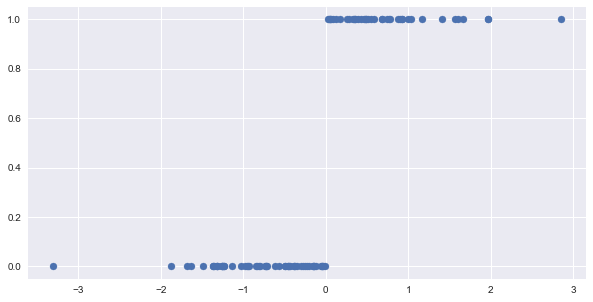

In [3]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize = 10)

In [4]:
class classifier(tf.keras.Model):
    def __init__(self):
        super(classifier, self).__init__()
        
        self.d1 = tf.keras.layers.Dense(units = 1,
                                        activation = 'sigmoid')
        
    def call(self, x):
        predictions = self.d1(x)
        return predictions

In [5]:
EPOCHS = 10
LR = 0.01

In [6]:
model = classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)

loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()

In [7]:
for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, [1, 1]) # Make as matrix
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
            
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        loss_metric(loss) # loss accumulate
        acc_metric(y, predictions)
    
    print('Epoch: ', epoch)
    print('Train Loss: {:.4f}'.format(loss)) # only for a point
    print('Train Mean Loss {:.4f}\t Train Accuracy {:.4f}%\n'.format(loss_metric.result(), acc_metric.result()*100)) # mean for entire points
    
    loss_metric.reset_states()
    acc_metric.reset_states()

Epoch:  0
Train Loss: 0.1409
Train Mean Loss 0.3978	 Train Accuracy 100.0000%

Epoch:  1
Train Loss: 0.1152
Train Mean Loss 0.3706	 Train Accuracy 100.0000%

Epoch:  2
Train Loss: 0.0954
Train Mean Loss 0.3491	 Train Accuracy 100.0000%

Epoch:  3
Train Loss: 0.0799
Train Mean Loss 0.3315	 Train Accuracy 100.0000%

Epoch:  4
Train Loss: 0.0676
Train Mean Loss 0.3168	 Train Accuracy 100.0000%

Epoch:  5
Train Loss: 0.0577
Train Mean Loss 0.3042	 Train Accuracy 100.0000%

Epoch:  6
Train Loss: 0.0497
Train Mean Loss 0.2933	 Train Accuracy 100.0000%

Epoch:  7
Train Loss: 0.0430
Train Mean Loss 0.2837	 Train Accuracy 100.0000%

Epoch:  8
Train Loss: 0.0375
Train Mean Loss 0.2752	 Train Accuracy 100.0000%

Epoch:  9
Train Loss: 0.0329
Train Mean Loss 0.2676	 Train Accuracy 100.0000%



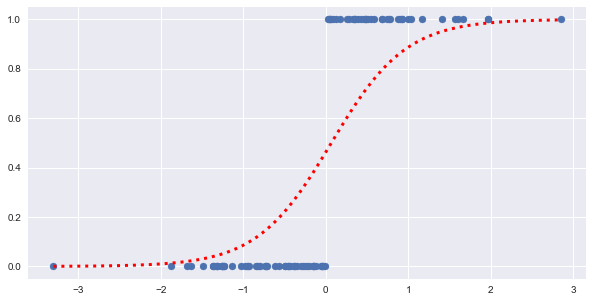

In [8]:
x_min, x_max = min(x_train), max(x_train)
x_test = tf.linspace(x_min, x_max, 300)
y_test = model(x_test)

fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize = 10)
ax.plot(x_test, y_test, 'r:', linewidth = 3) # red dotted line